# Clustering 

## Clustering of Products in a Supermarket Store

In [68]:
#### Lets import the necessary python Libaries needed

import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Importing our dataset

data =pd.read_csv(r'C:\Users\IamFavoured\Desktop\IKEBUKWU\Database\Githubsite\Adv 3\train_v9rqX0R.csv')

In [3]:
## First 5 columns of our dataframe

data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
## dataframe information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
## Checking null values

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
## Checking the shape of dataframe (No of rows, No of Columns)

data.shape

(8523, 12)

In [7]:
data.dropna(axis=0, inplace=True)
data.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
          ,inplace=True)
data.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0        9.300         0.016047  249.8092          3735.1380
1        5.920         0.019278   48.2692           443.4228
2       17.500         0.016760  141.6180          2097.2700
4        8.930         0.000000   53.8614           994.7052
5       10.395         0.000000   51.4008           556.6088

In [8]:
## Checking null values

data.isnull().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
dtype: int64

In [9]:
## Lets do some feature engineering
## we have the market retail price and the item outlet sales, we can obtain the the number of units sold by dividing those two parameters
## Number of units sold =Outlet_sales/market_retail price

data['Item_Units_sold']= data['Item_Outlet_Sales']// data['Item_MRP']
data.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  Item_Units_sold
0        9.300         0.016047  249.8092          3735.1380             14.0
1        5.920         0.019278   48.2692           443.4228              9.0
2       17.500         0.016760  141.6180          2097.2700             14.0
4        8.930         0.000000   53.8614           994.7052             18.0
5       10.395         0.000000   51.4008           556.6088             10.0

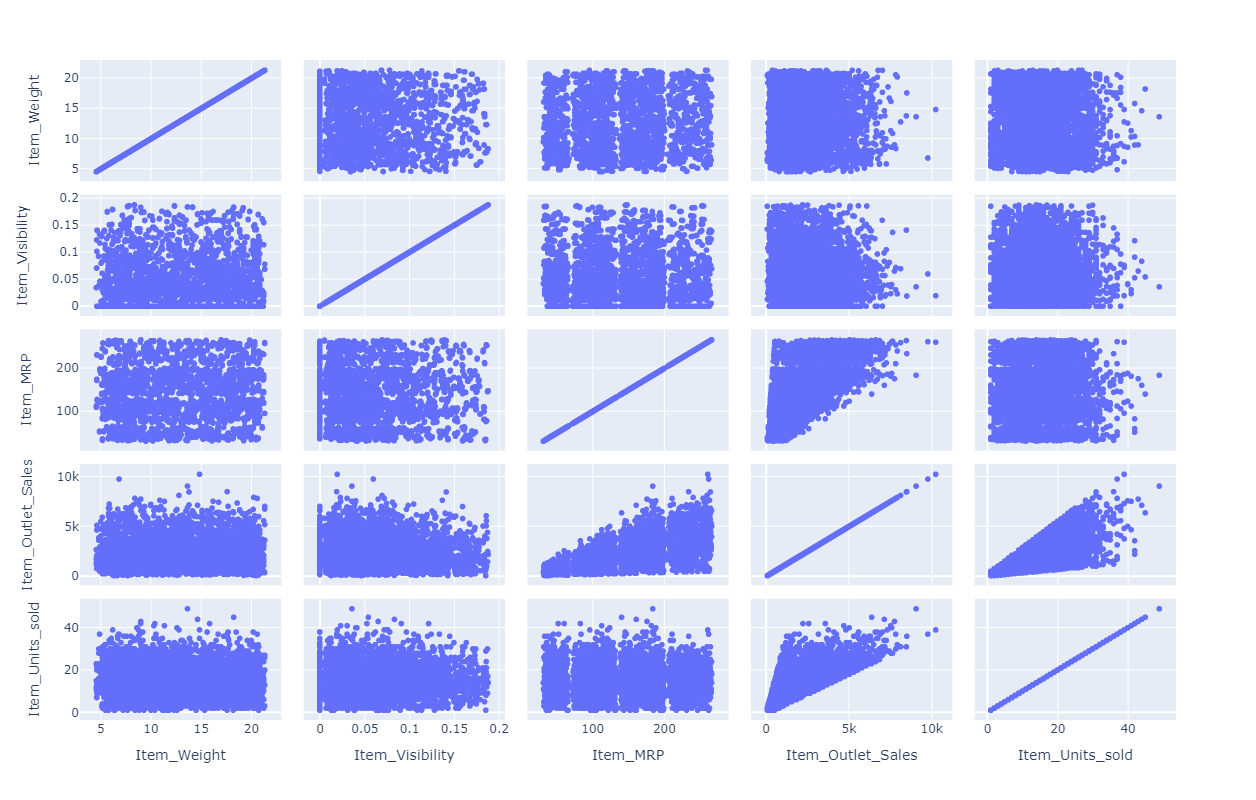

In [10]:
fig=px.scatter_matrix(data, width=800, height=800)
fig.show()

In [11]:
data.corr()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
Item_Weight           1.000000        -0.010229  0.033330           0.010972   
Item_Visibility      -0.010229         1.000000 -0.007292          -0.009644   
Item_MRP              0.033330        -0.007292  1.000000           0.679594   
Item_Outlet_Sales     0.010972        -0.009644  0.679594           1.000000   
Item_Units_sold      -0.021801        -0.010124  0.030933           0.691328   

                   Item_Units_sold  
Item_Weight              -0.021801  
Item_Visibility          -0.010124  
Item_MRP                  0.030933  
Item_Outlet_Sales         0.691328  
Item_Units_sold           1.000000

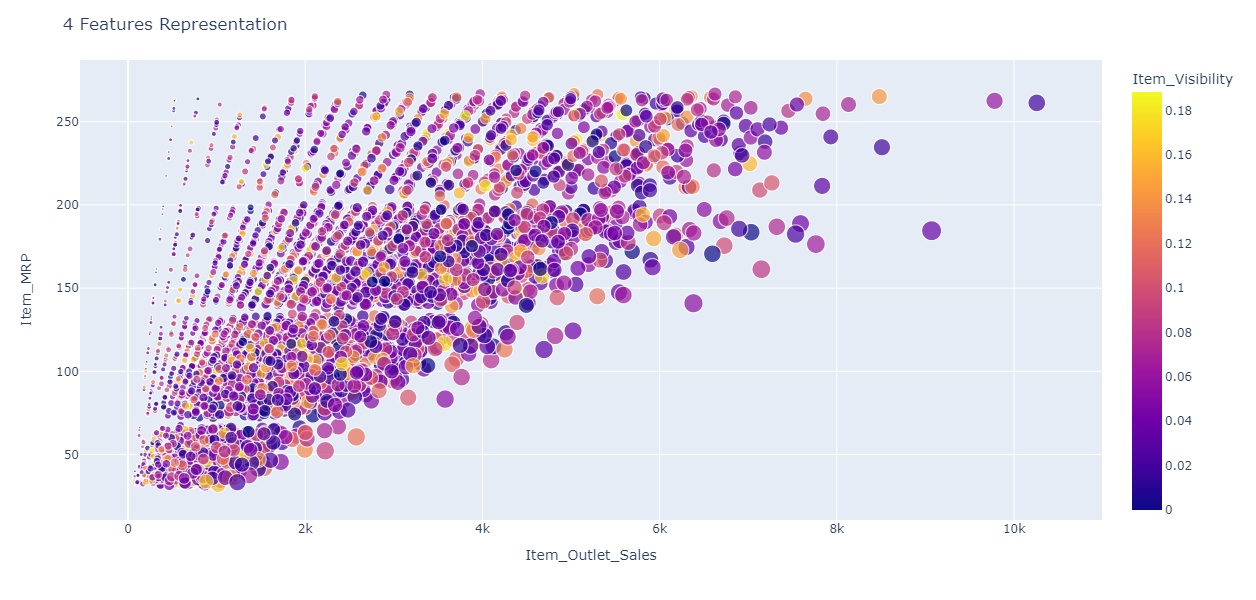

In [13]:
## We can observe the positive correlation between the item market retail price and the Outlet_sales
## We can also observe that bigger circles are around the right side indicating higher outlet sales

fig1=px.scatter(data,x='Item_Outlet_Sales',y='Item_MRP',color='Item_Visibility',size='Item_Units_sold',height=600)
fig1.update_layout(title='4 Features Representation')
fig1.show()

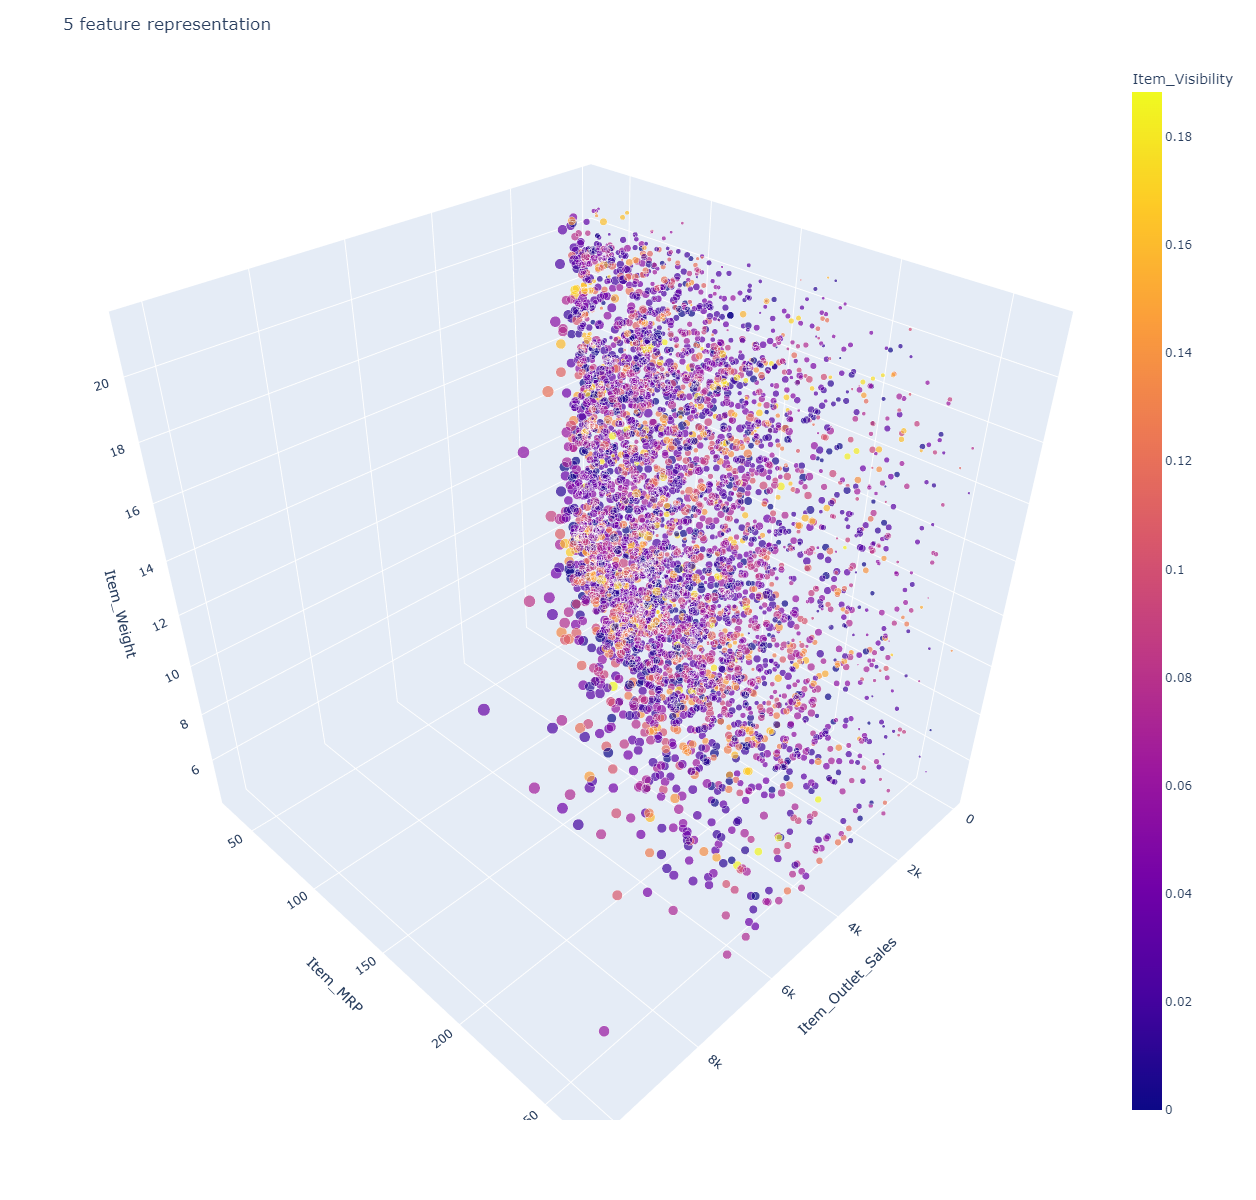

In [19]:
## Lets get a 3D plot for our 5 features
fig2=px.scatter_3d(data,x='Item_Outlet_Sales',y='Item_MRP',z='Item_Weight',color='Item_Visibility',size='Item_Units_sold',width=1000,height=1200)
fig2.update_layout(title='5 feature representation')
fig2.show()

### Clustering Our Features

In [20]:
## Lets Scale our values using MinMax Scaler
## We have already imported our lib
## Lets go ahead and instantiate the model as object of its class

scaler=MinMaxScaler()

In [22]:
##
column=data.columns
scaled_data_array=scaler.fit_transform(data)
scaled_data_dataframe=pd.DataFrame(data=scaled_data_array,columns=column)

In [23]:
scaled_data_array

array([[0.28252456, 0.08521174, 0.92744556, 0.35984576, 0.27083333],
       [0.08127419, 0.10236801, 0.07128001, 0.03672963, 0.16666667],
       [0.77076511, 0.08899659, 0.46783665, 0.19907196, 0.27083333],
       ...,
       [0.35992855, 0.18684034, 0.22783672, 0.11031959, 0.27083333],
       [0.15808276, 0.77112676, 0.30434871, 0.17436769, 0.33333333],
       [0.61000298, 0.23830525, 0.18681945, 0.06836154, 0.1875    ]])

In [24]:
scaled_data_dataframe

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0        0.282525         0.085212  0.927446           0.359846   
1        0.081274         0.102368  0.071280           0.036730   
2        0.770765         0.088997  0.467837           0.199072   
3        0.260494         0.000000  0.095036           0.090844   
4        0.347723         0.000000  0.084583           0.047840   
...           ...              ...       ...                ...   
4645     0.964275         0.443954  0.625925           0.347428   
4646     0.137541         0.301522  0.777541           0.265930   
4647     0.359929         0.186840  0.227837           0.110320   
4648     0.158083         0.771127  0.304349           0.174368   
4649     0.610003         0.238305  0.186819           0.068362   

      Item_Units_sold  
0            0.270833  
1            0.166667  
2            0.270833  
3            0.354167  
4            0.187500  
...               ...  
4645         0.395833  
4646         0.229167  
4647         0.270833  
4648         0.333333  
4649         0.187500  

[4650 rows x 5 columns]

## Using Elbow Technique

In [59]:
## This technique is used to get the optimal value of our clusters
## Lets run a loop

k_range =range(1,11)
def inertia(cluster):
    km=KMeans(n_clusters=cluster)
    km.fit(data)
    return km.inertia_

In [60]:
inertia_values =list(map(inertia,k_range))

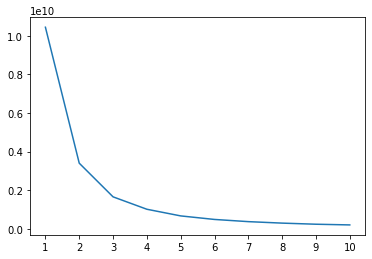

In [54]:
## Using MatplotLib

from matplotlib import pyplot as plt
plt.plot(k_range,inertia_values);
plt.xticks(k_range);

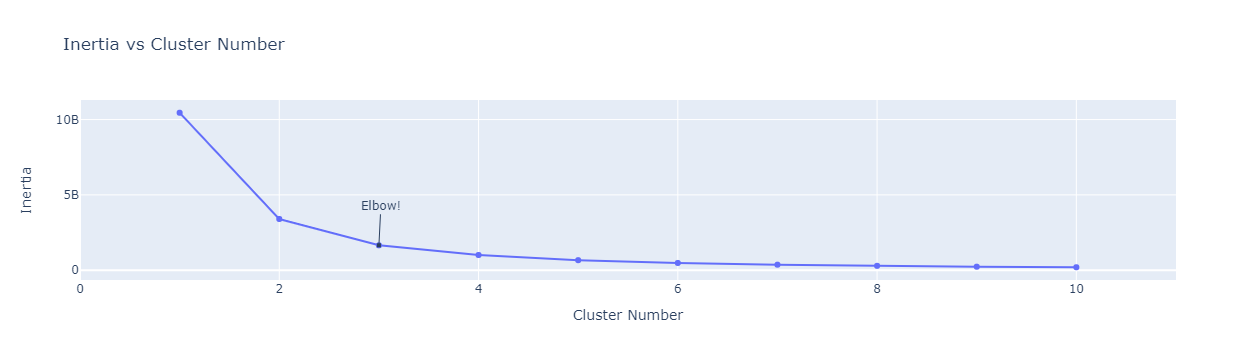

In [78]:
Using Plotly

fig=go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia_values))
fig.update_layout(title='Inertia vs Cluster Number', xaxis=dict(range=[0,11],title='Cluster Number'),yaxis={'title':'Inertia'},
                  annotations =[dict(x=3,y=inertia_values[2],xref='x',yref='y',text='Elbow!',showarrow=True,arrowhead=7,ax=2,ay=-40)])

### Using number of Clusters=3

In [74]:
## Since we have multiple features, and this is not a dimensionality reduction problem
## We are going to select two features withe highest correlation coefficient
## Dimensional reduction we will be handled in another assignment problem

In [83]:
km=KMeans(n_clusters=3)
y_cluster=km.fit_predict(scaled_data_dataframe[['Item_Units_sold','Item_Outlet_Sales']])
y_cluster

array([0, 1, 0, ..., 1, 0, 1])

In [84]:
## Appending the cluster to the dataframe

scaled_data_dataframe['Cluster']=y_cluster
scaled_data_dataframe

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0        0.282525         0.085212  0.927446           0.359846   
1        0.081274         0.102368  0.071280           0.036730   
2        0.770765         0.088997  0.467837           0.199072   
3        0.260494         0.000000  0.095036           0.090844   
4        0.347723         0.000000  0.084583           0.047840   
...           ...              ...       ...                ...   
4645     0.964275         0.443954  0.625925           0.347428   
4646     0.137541         0.301522  0.777541           0.265930   
4647     0.359929         0.186840  0.227837           0.110320   
4648     0.158083         0.771127  0.304349           0.174368   
4649     0.610003         0.238305  0.186819           0.068362   

      Item_Units_sold  Cluster  
0            0.270833        0  
1            0.166667        1  
2            0.270833        0  
3            0.354167        0  
4            0.187500        1  
...               ...      ...  
4645         0.395833        0  
4646         0.229167        0  
4647         0.270833        1  
4648         0.333333        0  
4649         0.187500        1  

[4650 rows x 6 columns]

In [85]:
## Cluster centers
cluster_centers=km.cluster_centers_
cluster_centers

array([[0.34510917, 0.22484827],
       [0.16556204, 0.10180976],
       [0.50004914, 0.45121935]])

### Visualizing Clusters in a Scatter Plot

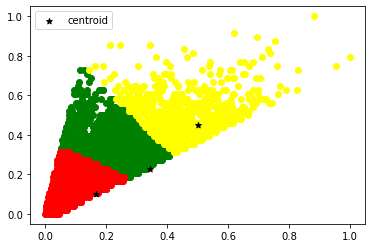

In [87]:
df1 =scaled_data_dataframe[scaled_data_dataframe.Cluster==0]
df2 =scaled_data_dataframe[scaled_data_dataframe.Cluster==1]
df3 =scaled_data_dataframe[scaled_data_dataframe.Cluster==2]

plt.scatter(df1.Item_Outlet_Sales,df1.Item_Units_sold, color='green')
plt.scatter(df2.Item_Outlet_Sales,df2.Item_Units_sold, color='red')
plt.scatter(df3.Item_Outlet_Sales,df3.Item_Units_sold, color='yellow');

## Lets plot the cluster centers in our graph
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],color='black',marker='*',label='centroid')
plt.legend();